In [1]:
import os
import glob
import numpy as np
import pandas as pd
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import re

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [13]:
from matplotlib import pyplot as plt

In [50]:
import scattertext as st

In [ ]:
# mar 01 - siege of mariupol
# mar 13 - lviv attack
# mar 15 - mariupol hospital siege
# mar 16 - mariupol theater bombed
# apr 03 - withdrawal from bucha - evidence of atrocities
# apr 08 - bombing of karmatorsk railway

In [112]:
mar01_docs = pd.read_pickle(r"mar01.pickle")
mar13_docs = pd.read_pickle(r"mar13.pickle")
mar15_docs = pd.read_pickle(r"mar15.pickle")
mar16_docs = pd.read_pickle(r"mar16.pickle")
apr03_docs = pd.read_pickle(r"apr03.pickle")
apr08_docs = pd.read_pickle(r"apr08.pickle")

In [113]:
vader = SentimentIntensityAnalyzer()

In [8]:
def get_scores(docs):
    scores=[]
    for i in docs:
        score=vader.polarity_scores(i)
        scores.append(score)
    return scores

In [182]:
feb_docs = pd.read_pickle(r"feb.pickle")
feb_scores = get_scores(feb_docs)
feb_scoredf = pd.DataFrame(feb_scores)
combined_feb = feb_scoredf
combined_feb["text"] = feb_docs



<Figure size 720x360 with 0 Axes>

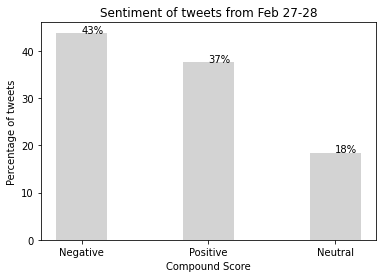

In [183]:
feb_chart = get_counts(combined_feb, "Feb 27-28")

In [114]:
mar01_scores = get_scores(mar01_docs)

In [115]:
mar13_scores = get_scores(mar13_docs)
mar15_scores = get_scores(mar15_docs)
mar16_scores = get_scores(mar16_docs)
apr03_scores = get_scores(apr03_docs)
apr08_scores = get_scores(apr08_docs)

In [116]:
# convert to dataframe
mar01_scoredf = pd.DataFrame(mar01_scores)
mar13_scoredf = pd.DataFrame(mar13_scores)
mar15_scoredf = pd.DataFrame(mar15_scores)
mar16_scoredf = pd.DataFrame(mar16_scores)
apr03_scoredf = pd.DataFrame(apr03_scores)
apr08_scoredf = pd.DataFrame(apr08_scores)

In [117]:
# combine scores with docs
combined_mar01 = mar01_scoredf
combined_mar01["text"] = mar01_docs

combined_mar13 = mar13_scoredf
combined_mar13["text"] = mar13_docs

combined_mar15 = mar15_scoredf
combined_mar15["text"] = mar15_docs

combined_mar16 = mar16_scoredf
combined_mar16["text"] = mar16_docs

combined_apr03 = apr03_scoredf
combined_apr03["text"] = apr03_docs

combined_apr08 = apr08_scoredf
combined_apr08["text"] = apr08_docs

In [118]:
def get_counts(df, date):
    
    column_neg = df["neg"]
    column_pos = df["pos"]
    column_neu = df["neu"]
    column_comp = df["compound"]
    
    #neg_count = column_neg[df["neg"] > 0].count()
    #pos_count = column_pos[df["pos"] > 0].count()
    #neu_count = column_neu[df["neu"]==1].count()

    comp_neg = column_comp[df["compound"]<0].count()
    comp_pos = column_comp[df["compound"]>0].count()
    comp_neu = column_comp[df["compound"]==0].count()
    
    percent_neg = (comp_neg/100000)*100
    percent_pos = (comp_pos/100000)*100
    percent_neu = (comp_neu/100000)*100

    
    fig = plt.figure(figsize = (10, 5))
    ax = plt.subplots()
    
    indexes = ["Negative","Positive","Neutral"]
    values = [percent_neg,percent_pos,percent_neu]
    
    for index, value in enumerate(values):
        plt.text(index,value,str(int(value))+"%")
    
    plt.bar(indexes, values, color ='lightgray',
        width = 0.4)
 
    plt.xlabel("Compound Score")
    plt.ylabel("Percentage of tweets")
    plt.title("Sentiment of tweets from " + date)
    
    plt.savefig(date+"2.png")
    
    return fig

<Figure size 720x360 with 0 Axes>

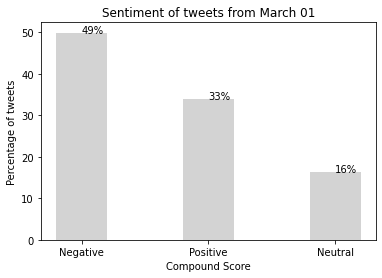

<Figure size 720x360 with 0 Axes>

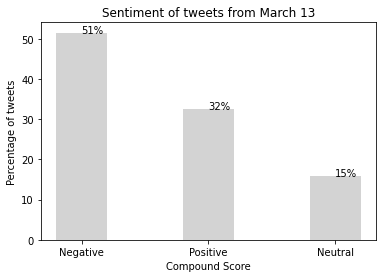

<Figure size 720x360 with 0 Axes>

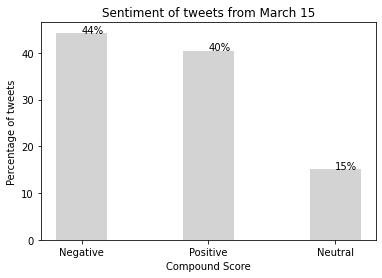

<Figure size 720x360 with 0 Axes>

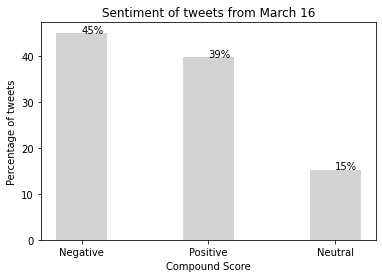

<Figure size 720x360 with 0 Axes>

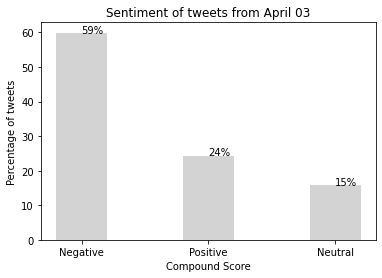

<Figure size 720x360 with 0 Axes>

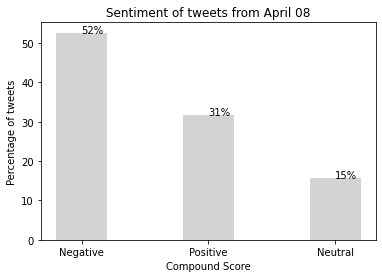

In [119]:
mar01_chart = get_counts(combined_mar01, "March 01")
mar13_chart = get_counts(combined_mar13, "March 13")
mar15_chart = get_counts(combined_mar15, "March 15")
mar16_chart = get_counts(combined_mar16, "March 16")
apr03_chart = get_counts(combined_apr03, "April 03")
apr08_chart = get_counts(combined_apr08, "April 08")

In [129]:
mar01 = pd.DataFrame({"date":"mar01", "text":mar01_docs.values})
mar13 = pd.DataFrame({"date":"mar13", "text":mar13_docs.values})
mar15 = pd.DataFrame({"date":"mar15", "text":mar15_docs.values})
mar16 = pd.DataFrame({"date":"mar16", "text":mar16_docs.values})
apr03 = pd.DataFrame({"date":"apr03", "text":apr03_docs.values})
apr08 = pd.DataFrame({"date":"apr08", "text":apr08_docs.values})

In [134]:
mar01_token = pd.read_pickle(r"mar01token.pickle")

In [142]:
mar01_token[3]

'@ PrezidentZeman STOP RUSSIAN AGGRESSION UKRAINE . @ NATO CLOSE SKY UKRAINE ! EXCLUDE RUSSIA @ UN SECURITY COUNCIL ! ! ! StopPutin StopRussia'

In [137]:
mar01toke = pd.DataFrame({"date":"mar01","text":mar01_token.values})

In [139]:
mar13_token = pd.read_pickle(r"mar13token.pickle")
mar13toke = pd.DataFrame({"date":"mar13","text":mar13_token.values})
token_mar01_mar13 = mar01toke.append(mar13toke)

/var/folders/6l/6tcwml6d7hqb9tfsn7kf5z6r0000gn/T/ipykernel_22454/1354444393.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  token_mar01_mar13 = mar01toke.append(mar13toke)


In [173]:
mar15_token = pd.read_pickle(r"mar15token.pickle")
mar16_token = pd.read_pickle(r"mar16token.pickle")
apr03_token = pd.read_pickle(r"apr03token.pickle")
apr08_token = pd.read_pickle(r"apr08token.pickle")

mar15toke = pd.DataFrame({"date":"mar15","text":mar15_token.values})
mar16toke = pd.DataFrame({"date":"mar16","text":mar16_token.values})
apr03toke = pd.DataFrame({"date":"apr03","text":apr03_token.values})
apr08toke = pd.DataFrame({"date":"apr08","text":apr08_token.values})

In [158]:
#mar01 v mar13
mar0113token_corp = st.CorpusFromPandas(token_mar01_mar13,
                             category_col="date",
                             text_col="text",
                             nlp=st.whitespace_nlp_with_sentences
                            ).build()

In [168]:
first = st.produce_scattertext_explorer(
        mar0113token_corp,
        category="mar01",
        category_name="March 01",
        not_category_name="March 13",
        minimum_term_frequency=5000,
        pmi_threshold_coefficient=5,
        width_in_pixels=700
        )
open("first.html", "wb").write(first.encode("utf-8"));

In [170]:
#mar01 v mar15
token_mar01_mar15 = mar01toke.append(mar15toke)
mar0115token_corp = st.CorpusFromPandas(token_mar01_mar15,
                             category_col="date",
                             text_col="text",
                             nlp=st.whitespace_nlp_with_sentences
                            ).build()
second = st.produce_scattertext_explorer(
        mar0115token_corp,
        category="mar01",
        category_name="March 01",
        not_category_name="March 15",
        minimum_term_frequency=5000,
        pmi_threshold_coefficient=5,
        width_in_pixels=700
        )
open("second.html", "wb").write(second.encode("utf-8"));

/var/folders/6l/6tcwml6d7hqb9tfsn7kf5z6r0000gn/T/ipykernel_22454/1298757141.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  token_mar01_mar15 = mar01toke.append(mar15toke)


In [171]:
#mar01 v mar16
token_mar01_mar16 = mar01toke.append(mar16toke)
mar0116token_corp = st.CorpusFromPandas(token_mar01_mar16,
                             category_col="date",
                             text_col="text",
                             nlp=st.whitespace_nlp_with_sentences
                            ).build()
third = st.produce_scattertext_explorer(
        mar0116token_corp,
        category="mar01",
        category_name="March 01",
        not_category_name="March 16",
        minimum_term_frequency=5000,
        pmi_threshold_coefficient=5,
        width_in_pixels=700
        )
open("third.html", "wb").write(third.encode("utf-8"));

/var/folders/6l/6tcwml6d7hqb9tfsn7kf5z6r0000gn/T/ipykernel_22454/591869717.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  token_mar01_mar16 = mar01toke.append(mar16toke)


In [174]:
#mar01 v apr03
token_mar01_apr03 = mar01toke.append(apr03toke)
mar01apr03token_corp = st.CorpusFromPandas(token_mar01_apr03,
                             category_col="date",
                             text_col="text",
                             nlp=st.whitespace_nlp_with_sentences
                            ).build()
fourth = st.produce_scattertext_explorer(
        mar01apr03token_corp,
        category="mar01",
        category_name="March 01",
        not_category_name="April 03",
        minimum_term_frequency=5000,
        pmi_threshold_coefficient=5,
        width_in_pixels=700
        )
open("fourth.html", "wb").write(fourth.encode("utf-8"));

/var/folders/6l/6tcwml6d7hqb9tfsn7kf5z6r0000gn/T/ipykernel_22454/3259790059.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  token_mar01_apr03 = mar01toke.append(apr03toke)


In [175]:
#mar01 v apr08
token_mar01_apr08 = mar01toke.append(apr08toke)
mar01apr08token_corp = st.CorpusFromPandas(token_mar01_apr08,
                             category_col="date",
                             text_col="text",
                             nlp=st.whitespace_nlp_with_sentences
                            ).build()
fifth = st.produce_scattertext_explorer(
        mar01apr08token_corp,
        category="mar01",
        category_name="March 01",
        not_category_name="April 08",
        minimum_term_frequency=5000,
        pmi_threshold_coefficient=5,
        width_in_pixels=700
        )
open("fifth.html", "wb").write(fifth.encode("utf-8"));

/var/folders/6l/6tcwml6d7hqb9tfsn7kf5z6r0000gn/T/ipykernel_22454/272322242.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  token_mar01_apr08 = mar01toke.append(apr08toke)


In [181]:
#mar01 v all other dates
token_mar01_rest = mar01toke.append(mar13toke)
token_mar01_rest = token_mar01_rest.append(mar15toke)
token_mar01_rest = token_mar01_rest.append(mar16toke)
token_mar01_rest = token_mar01_rest.append(apr03toke)
token_mar01_rest = token_mar01_rest.append(apr08toke)
mar01resttoken_corp = st.CorpusFromPandas(token_mar01_rest,
                             category_col="date",
                             text_col="text",
                             nlp=st.whitespace_nlp_with_sentences
                            ).build()
rest = st.produce_scattertext_explorer(
        mar01resttoken_corp,
        category="mar01",
        category_name="March 01",
        not_category_name="All other dates",
        minimum_term_frequency=7000,
        pmi_threshold_coefficient=5,
        width_in_pixels=1000
        )
open("rest.html", "wb").write(rest.encode("utf-8"));

/var/folders/6l/6tcwml6d7hqb9tfsn7kf5z6r0000gn/T/ipykernel_22454/3601113689.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  token_mar01_rest = mar01toke.append(mar13toke)
/var/folders/6l/6tcwml6d7hqb9tfsn7kf5z6r0000gn/T/ipykernel_22454/3601113689.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  token_mar01_rest = token_mar01_rest.append(mar15toke)
/var/folders/6l/6tcwml6d7hqb9tfsn7kf5z6r0000gn/T/ipykernel_22454/3601113689.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  token_mar01_rest = token_mar01_rest.append(mar16toke)
/var/folders/6l/6tcwml6d7hqb9tfsn7kf5z6r0000gn/T/ipykernel_22454/3601113689.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

In [178]:
token_mar01_rest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    600000 non-null  object
 1   text    600000 non-null  object
dtypes: object(2)
memory usage: 13.7+ MB


In [130]:
#mar01_mar13 = mar01.append(mar13)

/var/folders/6l/6tcwml6d7hqb9tfsn7kf5z6r0000gn/T/ipykernel_22454/96437509.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mar01_mar13 = mar01.append(mar13)


In [131]:
#mar01_13_corp = st.CorpusFromPandas(mar01_mar13,
#                             category_col="date",
#                             text_col="text",
#                             nlp=st.whitespace_nlp_with_sentences
#                            ).build()

In [132]:
#first = st.produce_scattertext_explorer(
#        mar01_13_corp,
#        category="mar01",
#        category_name="March 01",
#        not_category_name="March 13",
#        minimum_term_frequency=20000,
#        pmi_threshold_coefficient=5,
#        width_in_pixels=1000
#        )

In [133]:
#open('first.html', 'wb').write(first.encode('utf-8'));

In [120]:
mar01_cv = CountVectorizer(ngram_range=(1,2),stop_words='english',max_features=10000)

In [121]:
siege = mar01_cv.fit_transform(mar01_docs)

In [122]:
siege_doc = siege.toarray()

In [123]:
mar01_cv.vocabulary_

{'40': 157,
 'mile': 5098,
 'long': 4789,
 'russian': 7087,
 'military': 5107,
 'convoy': 1866,
 'approaching': 672,
 'ukraine': 8777,
 'capital': 1360,
 'youtube': 9952,
 'russiaukrainewar': 7233,
 '40 mile': 160,
 'mile long': 5100,
 'long russian': 4796,
 'russian military': 7125,
 'military convoy': 5114,
 'ukraine capital': 8813,
 'sister': 7655,
 'trapped': 8637,
 'thread': 8465,
 'incredible': 3962,
 'journey': 4282,
 'reach': 6563,
 'poland': 6086,
 'escape': 2692,
 'experienced': 2837,
 'racism': 6521,
 'injuries': 4043,
 'freezing': 3232,
 'temps': 8389,
 'sleep': 7688,
 'deprivation': 2223,
 'story': 8079,
 'hundreds': 3829,
 'thousands': 8463,
 'people': 5931,
 'trying': 8698,
 'sister trapped': 7656,
 'trapped ukraine': 8639,
 'ukraine thread': 9016,
 'thread incredible': 8467,
 'incredible journey': 3963,
 'journey reach': 4283,
 'reach poland': 6565,
 'poland escape': 6090,
 'escape experienced': 2693,
 'experienced racism': 2838,
 'racism injuries': 6522,
 'injuries fre

In [124]:
mar01_words = mar01_cv.get_feature_names_out()

In [125]:
ind = np.argsort(siege_doc.sum(axis=0))[-100:]

top_100_words = [mar01_words[a] for a in ind]

In [126]:
print(top_100_words)

['news', 'says', 'peace', 'bomb', 'ukraineinvasion', 'eucopresident', 'israel', 'supplies', 'doing', 'tv', 'russians', 'kiev', 'troops', 'vonderleyen', 'air', 'attack', 'soldiers', 'sanctions', 'civilians', 'video', 'want', 'international', 'ukrainewar', 'children', 'anonymous', 'know', 'european', 'ukrainians', 'war ukraine', 'zelensky', 'fighting', 'ukraineunderattack', 'poland', 'state', 'time', 'potus', 'indian', 'left', 'ukraine ukrainerussiawar', 'media', 'army', 'breaking', 'palestine', 'forces', 'need', 'said', 'city', 'europe', 'don', 'day', 'president', 'like', 'invasion', 'eu', 'russiaukrainewar', 'russia ukraine', 'standwithukraine', 'support', 'country', 'council stopputin', 'stopputin stoprussia', 'today', 'just', 'stop russian', 'ukraine nato', 'aggression ukraine', 'russian aggression', 'help', 'military', 'ukraine russia', 'kharkiv', 'aggression', 'russiaukraine', 'nato close', 'stopputin', 'ukraine exclude', 'exclude russia', 'exclude', 'security council', 'russia sec

In [127]:
opp = np.argsort(siege_doc.sum(axis=0))[:100]

least_100_words = [mar01_words[a] for a in opp]

In [128]:
print(least_100_words)

['combat russian', 'plea', 'square 2008', 'europarl_en stopputin', 'attacking civilians', 'georgians refusing', 'driver', 'taking trucks', 'national guard', 'denounce', 'high precision', 'correspondent', 'russia nuclear', '40 122mm', 'bless ukraine', 'cameraman street', 'spoken', 'russia stopped', 'vitaliy_klychko', 'air defence', 'playing friends', 'raided russian', 'thinking difficult', 'amp bomb', 'shelter specialized', 'ukraine grateful', 'efforts indian', 'ranks', 'rostov', 'sold', 'destroyed ukrainian', 'picoftheday', 'govt submissionwe', 'includes subtitles', 'msta', 'family died', 'rubblerussiaukraine', 'ukrainewar russiabreaking', 'rubblerussiaukraine russianarmy', 'attack palestinen', 'uk ukraine', 'loaded 40', 'putin attacking', 'barbaric crime', 'ukraine international', 'combat medic', 'spain', 'base okhtyrka', 'prosecutor international', 'russiaukraine racisteu', 'took place', 'survivor grandson', 'prohibiting', 'usa come', 'donations ukraine', 'north east', 'information a

In [146]:
mar01token_cv = CountVectorizer(ngram_range=(1,2),stop_words='english',max_features=10000)
siege_token = mar01token_cv.fit_transform(mar01_token)
siege_token_doc = siege_token.toarray()
mar01token_cv.vocabulary_
mar01token_words = mar01token_cv.get_feature_names_out()
ind_toke = np.argsort(siege_token_doc.sum(axis=0))[-100:]

top_100_words_token = [mar01token_words[a] for a in ind_toke]

print(top_100_words_token)

['right', 'new', 'students', 'countries', 'news', 'says', 'peace', 'bomb', 'ukraineinvasion', 'eucopresident', 'israel', 'supplies', 'tv', 'russians', 'kiev', 'troops', 'vonderleyen', 'air', 'attack', 'soldiers', 'civilians', 'sanctions', 'video', 'want', 'international', 'ukrainewar', 'children', 'anonymous', 'know', 'european', 'ukrainians', 'war ukraine', 'zelensky', 'fighting', 'ukraineunderattack', 'poland', 'state', 'time', 'potus', 'indian', 'left', 'ukraine ukrainerussiawar', 'media', 'army', 'breaking', 'palestine', 'forces', 'need', 'said', 'city', 'europe', 'day', 'president', 'like', 'invasion', 'eu', 'russiaukrainewar', 'standwithukraine', 'support', 'russia ukraine', 'country', 'council stopputin', 'stopputin stoprussia', 'today', 'stop russian', 'ukraine nato', 'aggression ukraine', 'russian aggression', 'help', 'military', 'ukraine russia', 'kharkiv', 'aggression', 'russiaukraine', 'nato close', 'stopputin', 'ukraine exclude', 'exclude russia', 'exclude', 'security coun

In [148]:
opp_toke = np.argsort(siege_token_doc.sum(axis=0))[:100]

least_100_words_token = [mar01token_words[a] for a in opp_toke]
print(least_100_words_token)

['confronting country', 'support making', 'peace world', 'starmer', 'begin 24', 'terror totally', 'grand', 'passing', 'concrete', 'war crisis', 'nationals swarmed', 'profound', 'contribute strengthening', '152mm msta', '152mm', 'strengthening russia', 'ukraine supportukraine', '140', 'protesting stopputin', 'roskomnadzor', 'aside', 'continued ukraine', '2004', 'jeancastex', 'claimed intended', '29 years', 'msta self', 'inconvenient', 'canadian comedian', 'ukraine continuing', 'ukraine day', 'russiaukraine define', 'polina', 'picoftheday ukraine', 'initial', 'charles', 'intended use', 'border serving', 'vonderleyen emmanuelmacron', 'perakov 29', 'helmets', 'supplies contribute', 'city center', 'israel ukrainerussiawar', 'japan introduces', 'hardware', 'transfers', 'pummelled russia', 'mrls loaded', 'outright', 'marks', 'airindia', 'evacuate ukraine', 'exports general', 'today fighting', 'media ukraine', '000 russian', 'tonight mrls', 'deeper', 'fifth day', 'enormous explosion', 'offices

In [256]:
apr03token_cv = CountVectorizer(ngram_range=(1,2),stop_words='english',max_features=10000)
bucha_token = apr03token_cv.fit_transform(apr03_token)
bucha_token_doc = bucha_token.toarray()
apr03token_cv.vocabulary_
apr03token_words = apr03token_cv.get_feature_names_out()

ind_bucha = np.argsort(bucha_token_doc.sum(axis=0))[-100:]
top_100_words_bucha = [apr03token_words[a] for a in ind_bucha]
print("Top 100 words")
print(top_100_words_bucha)

opp_bucha = np.argsort(bucha_token_doc.sum(axis=0))[:100]

least_100_words_bucha = [apr03token_words[a] for a in opp_bucha]
print("Least freq 100 words")
print(least_100_words_bucha)

Top 100 words
['ru', 'looted', 'kids', 'act', 'oblast', 'murdered', 'hello', 'girls', 'europe', 'kyiv region', 'russiaukrainewar', 'tied backs', 'trying', 'support', 'russian troops', 'backs', 'families', 'needs', 'says', 'let', 'leave', 'said', 'near kyiv', 'genocideofukrainians', 'liberated', 'clear', 'road', 'russian soldiers', 'help', 'destroyed', 'stopputinnow', 'need', 'children', 'ukrainerussiawar', 'photo', 'time', 'occupiers', 'gas', 'right', 'crime', 'hands tied', 'stop', 'genocide freeukraine', 'new', 'stopthewar ukraine', 'standwithukraine stopthewar', 'freeukraine standwithukraine', 'woman', 'genocide genocide', 'military', 'irpin', 'stopthewar', 'know', 'putinwarcrimes', 'freeukraine', 'atrocities', 'dead', 'left', 'army', 'region', 'shot', 'troops', 'tied', 'day', 'ukrainians', 'like', 'nato', 'city', 'rape', 'raped', 'mass', 'humiliate', 'hands', 'today', 'near', 'forces', 'war crimes', 'stoprussia', 'mariupol', 'soldiers', 'buchamassacre', 'crimes', 'russianwarcrimes',

In [184]:
mar01neg = combined_mar01.sort_values("neg",ascending=False)
mar01pos = combined_mar01.sort_values("pos",ascending=False)

In [220]:
mar01comp_neg = combined_mar01.sort_values("compound")
mar01comp_pos = combined_mar01.sort_values("compound",ascending=False)

In [247]:
mar13neg = combined_mar13.sort_values("neg",ascending=False)
mar13pos = combined_mar13.sort_values("pos",ascending=False)
mar13comp_neg = combined_mar13.sort_values("compound")
mar13comp_pos = combined_mar13.sort_values("compound",ascending=False)

In [219]:
mar15neg = combined_mar15.sort_values("neg",ascending=False)
mar15pos = combined_mar15.sort_values("pos",ascending=False)
mar15comp_neg = combined_mar15.sort_values("compound")
mar15comp_pos = combined_mar15.sort_values("compound",ascending=False)

In [221]:
mar16neg = combined_mar16.sort_values("neg",ascending=False)
mar16pos = combined_mar16.sort_values("pos",ascending=False)
mar16comp_neg = combined_mar16.sort_values("compound")
mar16comp_pos = combined_mar16.sort_values("compound",ascending=False)

In [222]:
apr03neg = combined_apr03.sort_values("neg",ascending=False)
apr03pos = combined_apr03.sort_values("pos",ascending=False)
apr03comp_neg = combined_apr03.sort_values("compound")
apr03comp_pos = combined_apr03.sort_values("compound",ascending=False)

In [223]:
apr08neg = combined_apr08.sort_values("neg",ascending=False)
apr08pos = combined_apr08.sort_values("pos",ascending=False)
apr08comp_neg = combined_apr08.sort_values("compound")
apr08comp_pos = combined_apr08.sort_values("compound",ascending=False)

In [201]:
def extract_tweets(df,number):
    print("Top "+str(number)+" tweets:")
    for i in range(0,number):
        print(str(i+1)+" "+df.iloc[i]["text"])
    return

In [224]:
print("March 01: Negative")
extract_tweets(mar01neg,20)

March 01: Negative
Top 20 tweets:
1 Fury 6.5/10UkraineRussiaWar fury 
2 Stop War now!UkrianeRussiaUkraineWarStopWarInUkraine 
3 ukraine (shamelessly stolen) 
4 Destruction Kharkiv 
5 Fuck Putin 
6 Fuck Putin 
7 Fuck Putin. 
8 putin Stop this shit! 
9 RUSSIANS KILL CIVILIANS!!!UkraineRussiaWarStopRussiaStopPutinRussiaInvadedUkraine
10 stop the war policy.Ukraine 
11 Defeat Putin'sPuppets 
12 STOP UkraineRussiaWar 
13 nuclearwarUkraineRussiaWar WorldWarIII REAL WAR Criminals.. 
14 nuclearwarUkraineRussiaWar WorldWarIII REAL WAR Criminals.. 
15 Bullshit incoming Ukraine Russia war 
16 Fuck Ukraine for its racism 
17 Spam, Spam everywhere UkraineRussiaWar 
18 grim times, grim header ☹️Ukraine SüdwindMagazin 
19 STOP the war, now! Ukraine
20 STOP the war, now! Ukraine


In [225]:
print("March 01: Positive")
extract_tweets(mar01pos,20)

March 01: Positive
Top 20 tweets:
1 Amazing courage. Ukriane 
2 GOD Bless Ukraine 
3 God bless Russia
4 Hope for peace hope peace Ukraine RussiaUkraine 
5 Well well well well well.Schröder Ukraine 
6 Freedom fighter.DefendUkraineDefendDemocracyUkraineRussiaWar 
7 GOD BLESS YOU! GOD BLESS UKRAINE! GOD GIVE PEACE AND WORLD FREEDOM! PRAYS! PRAY FOR PEACE! PRAY FOR UKRAINE!🇺🇦 
8 HUGE WIN UkraineRussiaWar Ukriane 
9 Lmfao UkraineWar 
10 Lmfao UkraineWar 
11 Lmfao UkraineWar 
12 Support Ukraine!! 
13 @MarcMichales @frijolesloca Wow.  Powerful. True.  PutinWarCriminal
14 Creativity is intelligence having fun.  tuesdayvibeUkraineRussiaWar 
15 Welcome move.UkraineRussiaWar 
16 putin please help the Peace @VPutin 
17 Help Ukraine 
18 Help us Help Ukraine 
19 Help Ukraine 
20 Praying ukraine 


In [226]:
print("March 01: Compound - most negative")
extract_tweets(mar01comp_neg,20)


March 01: Compound - most negative
Top 20 tweets:
1 Ukraine UkraineRussia UkraineRussiaWar UkraineWar russiaBreaking News: Just Now..Ukraine vs Russia War😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭
2 Ukraine UkraineRussia UkraineRussiaWar UkraineWar russiaBreaking News: Just NowUkraine vs Russia War😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭
3 Ukraine UkraineRussia UkraineRussiaWar UkraineWar russiaBreaking News: Just Now.......++++++Ukraine vs Russia War😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭
4 Ukraine UkraineRussia UkraineRussiaWar UkraineWar russiaBreaking News: Just Now.......Ukraine vs Russia War😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭
5 Ukraine UkraineRussia UkraineRussiaWar UkraineWar russiaBreaking News: Just Now......++Ukraine vs Russia War😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭
6 Ukraine UkraineRussia UkraineRussiaWar UkraineWar russiaBreaking News: Just Now....+.Ukraine vs Russia War😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭
7 Ukraine UkraineRussia UkraineRussiaWar UkraineWar russiaBreaking News: Just NowUkraine vs Russia War😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭
8 Ukraine UkraineRussia UkraineRussia

In [228]:
print("March 01: Compound - most positive")
extract_tweets(mar01comp_pos,20)

March 01: Compound - most positive
Top 20 tweets:
1 Listen to ABBA’s “Ode to freedom”! The group should dedicate the song to the brave Ukrainian people. @ABBA UkraineRussiaWar UkraineUnderAttack 💛💙💛💙💛💙💛💙💛💙💛💙 
2 @HeikkiOjala Happy New Week in beautiful Finland 🇫🇮 💙🇫🇮Dear Heikiki 💙🕊Good morning ☕️💐🌿💐 1/6/8c sunny ☀️ later ☀️Hugs from Wendy ☀️😻😻 AnimalLovers 😻😻🕊😻 MondayMorning ☕️💐☕️ UkraineConflict ☮️☮️☮️ PeaceNotWar ☮️💙☮️💙 
3 Sing louder &amp; love harder ... it's what the world needs now. 💛💛💛💛💛💛💛 peace in ukraine love shines bright Photo Credit: Jim Ziegler @ucmusicman 
4 lucky in love falls why short of the truth!! 🥲🇺🇦💖🤍😚🤍🥳🥳🤍🤍🍯♥️🎈💋💙🎀💗💌🖤🌷🤍🌴💚❤️‍🔥 keepupEuphoriagoodforthesoul911LoneStarcarFckPutinweekendbehaviourEuphoriaHBOMax UkraineRussiaWarWWERawEuphoriaFinale gymmfwdaterush Miamidatenight
5 @idclrWorldPeace @AharoniAda @kliebs @relax4balance @nellywagner @SkyBridgeMusic @guanduania @EmperorJustusI @AnneGWoodhead1 @Lightness2022 @HultinKatarina @HisHoneyButt @m__iwakiri @tomalpat @Erik

In [249]:
print("March 13: Negative")
extract_tweets(mar13neg,20)

March 13: Negative
Top 20 tweets:
1 flop
2 ANXIOUS
3 blocked!
4 Shitty.
5 UNEASY
6 Devastated
7 DEAD. 
8 Stop domestic violence! 
9 More WAR 
10 Anxiety attack again.
11 body pain!!!!!!
12 POOR Iraq! 
13 War crimesStandWithUkraine 
14 Putin's War...
15 @fayeeerytail_ Bullshit
16 same bitch 
17 Fuck Putin! 
18 fries po
19 The bloody scumbag Putin 
20 Fuck RussiaUkraine  


In [250]:
print("March 13: Positive")
extract_tweets(mar13pos,20)

March 13: Positive
Top 20 tweets:
1 lover! 
2 Please 
3 Congrats.
4 cutie
5 Trust 
6 Dream... 
7 OKAY
8 ✨virtual hugs ✨💖
9 @23ariel2 You're welcome 💗💗💗
10 Better GOD Blessed Ukraine 
11 Happy Monday 💗 
12 Motivation &amp; Opportunity🤗💖 
13 good morning, happy monday 💖
14 Wow. Interesting read.UkraineWar  
15 Coach💖 
16 @tiandesal Truly haha
17 Thank goodness StandWithUkraine 
18 @deedaboiii Congratulations!!!!
19 Love you!!! 
20 Good morning monday 💖


In [251]:
print("March 13: Compound - most negative")
extract_tweets(mar13comp_neg,20)

March 13: Compound - most negative
Top 20 tweets:
1 🕊☦️🕊 PRAYING FOR THE SOUL SALVATION OF BOTHUKRAINE &amp; RUSSIABECAUSE MY MASTER SAYS, ABOUT EVERY HUMAN BEING:“FATHER FORGIVE THEM, BECAUSE THEY DO NOT KNOW WHAT THEY ARE DOING”😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭 
2 Fascist Putin genocide against civilians in Bucha,Ukraine continues. 76 civilians buried in mass graves, some of them, impossible to establish ID. CHILDREN,WOMEN,ELDERY…😢😢😢😢😢😢😢😢😢😢😢“Russian Peace” for non Russian!🤬🇷🇺☠️🇷🇺Ukraine War Fascist Putin WarCrimes 
3 In Tigray, @hrw reported "the widespread conflict-related sexual violence including rape, gang rape, sexual slavery, and torture. Sexual violence took place alongside killings of family members, beatings, and psychological violence." IWD2022 Justice4TigrayWomen @endrapeinwar
4 Sounds like the UkraineWar might be ending. So the Covid 19 “news” is coming back 😭😭😭😭😭😭😭😭😭😭😭😭 
5 “Don't give to anyone the power to put you down. Haters are losers pretending to be 

In [252]:
print("March 13: Compound - most positive")
extract_tweets(mar13comp_pos,20)

March 13: Compound - most positive
Top 20 tweets:
1 @47angb @FAB87F @ERIC_1A @lizziedonny @321jz @Fed_Up_JS @SweetLouTiger @Minmcae @jAlmz5 @Chloe4Djt @aingelgrl @Will_OC_BA @_trump1_ @TraceBrownd1 @JDugudichi @keith0sta @fujacky2 @c0c0s0 @Im__Ken @smrose29 @DeenaKeys @dl4trump @BFes56 @BladeRocco @goin_nice @12LT3 @1us45 @goldisez @63redb @8_27J @Pat10th @gaburnsagain @FM_NoAlgos @6usmc1 @1_McRider @45Catnip @4us45 @JPC4USA @Giddeeupgo @MAGA_Corgi @MyMagaDays @Erica7016 @manoukliar @bellaisbubbly @MsKrayzi @USA_Patriot_S @SurgeRight I follow back always ☺️♥️💋♥️💋♥️💋♥️💋follobackforfolloback FolloForFolloBack follo4follo FolloMe japan folloforflowersback indonesia china germany folloback follo followback 💖💖💖💘💘💘💘💘💘💘💋💋💋💋💋💋🥰🥰🥰🥰🥰🥰🥰 russia ukraine 
2 I follow back always ☺️♥️💋♥️💋♥️💋♥️💋follobackforfolloback FolloForFolloBack follo4follo FolloMe japan folloforflowersback indonesia china germany folloback follo followback 💖💖💖💘💘💘💘💘💘💘💋💋💋💋💋💋🥰🥰🥰🥰🥰🥰🥰 russia ukraine 
3 I follow back always ☺️♥️💋♥️💋♥️💋

In [229]:
print("March 15: Negative")
extract_tweets(mar15neg,20)

March 15: Negative
Top 20 tweets:
1 Resigned
2 Boring
3 Boring~~~
4 Tired
5 Negative.
6 Frustrating
7 wasted
8 pain
9 Fake fake fake fake fake fake fakenews Ucraina russia 
10 Stop War Ukraine
11 Im tired. Drained
12 @emalenab12 sorry po
13 @kahimanawari__ GOPHER IT 🔥🔥🔥🔥🔥🔥
14 No emojis please
15 STOP WARS!!! StandWithUkraine KatrinaKaif 
16 Ffs. War criminals all around UkraineUnderAttack 
17 Init wtf
18 Horrible! Ukraine 
19 Hourly po
20 @revillas_jervie Shit


In [230]:
print("March 15: Positive")
extract_tweets(mar15pos,20)

March 15: Positive
Top 20 tweets:
1 Sure. Lol 
2 Brave 
3 Yes, please! 
4 Want 
5 Blessed 
6 Happy? 
7 Loyalty matters. 
8 Reliever 
9 Agree 
10 okay.
11 Happiness 
12 Definitely 
13 Want 
14 Cutie 
15 LOVE
16 nice
17 okay.
18 Perfection 💜 
19 @ZacHamTrendsOFC Happy fun fatherZACHAM HAPPY LIKE
20 Thank you sa food💖💖💖 


In [231]:
print("March 15: Compound - most negative")
extract_tweets(mar15comp_neg,20)

March 15: Compound - most negative
Top 20 tweets:
1 @mfa_russia @russiaqatar @MofaQatar_EN @RusEmbSyria @Presidency_Sy @UNEnvoySyria @RusembUkraine @MFA_Ukraine @RusMission_EU @Dpol_un @RussiaUN Putin has passed a law in Russia that would imprison anyone who says WAR  We don't do that in the FREE WORLD. WAR WAR WAR WAR WAR WAR WAR WAR WAR WARWAR WAR WAR WAR WAR WAR WAR WAR WAR PutinWarCrimes PutinWarCriminal PutinsWar RussiaUkraineWar 
2 Our convoy sets off in 5 days!We now have 20 vehicles filled with kit and equipment being donated to firefighters in Ukraine 🇺🇦 🚒🚒🚒🚒🚒🚒🚒🚒🚒🚒🚒🚒🚒🚒🚒🚒🚒🚒🚒🚒Here are some words by FIRE AID's @happyhoy90 on how this has all come about.FireAid4Ukraine 
3 Ukraine UkraineRussia UkraineRussiaWar UkraineWar russiaBreaking News: Just NowUkraine vs Russia War😭😭😭😭😭😭😭😭😭😭😭😭😭
4 Ukraine UkraineRussia UkraineRussiaWar UkraineWar russiaBreaking News: Just NowUkraine vs Russia War😭😭😭😭😭😭😭😭😭😭😭😭😭
5 @natynettle This is like a bad sci-fi movie, but it is real... where the evil lead

In [232]:
print("March 15: Compound - most positive")
extract_tweets(mar15comp_pos,20)

March 15: Compound - most positive
Top 20 tweets:
1 @lumpie125 @HARRYS1DEMPIRE @ginaaaa345 @Luisa1Queen @Tangerine4545 @TheRealPope7 @MarEthr @Leonina_0108 @bluea125 @r95731 @DianeDaQueen @ginestarros @Tina1Queen @AbidinBoryta @VIPGains @zaizul_abidin @TahneeQueen @Baloch_786_ @soymisteriosa_ @eReferenceDesk @luisalarosa @Siogo61 I follow back always ☺️♥️💋♥️💋♥️💋♥️follobackforfolloback FolloForFolloBack follo4follo FolloMe japan folloforflowersback indonesia china germany folloback follo followback 💖💘💘💘💘💘💋💋💋💋🥰🥰🥰🥰🥰 🥰🥰🥰🥰😂😂😂russia ukraine 
2 @naturedoll_moni @AlexiaAnnuk @MarthaCandia21 @MarianLuque4 @nealhailey @Aa_ban1 @oce2005 @Jemaco40 @swydersk @hRp__5 @WALLI27 @ElderAcost @glenton123 @Zar_43 @nbea_h @r95731 @Elvira57538981 @Jamesspencer211 @GRAHAM15583070 @SergioA60798547 @pajenrry76 @itijv I follow back always ☺️♥️💋♥️💋♥️💋♥️follobackforfolloback FolloForFolloBack follo4follo FolloMe japan folloforflowersback indonesia china germany folloback follo followback 💖💘💘💘💘💘💋💋💋💋🥰🥰🥰🥰🥰 🥰🥰🥰🥰😂😂😂ru

In [233]:
print("March 16: Negative")
extract_tweets(mar16neg,20)

March 16: Negative
Top 20 tweets:
1 Bullshit
2 Anxiety attacks.
3 seriously!!??? 
4 Ghost.
5 Frustrated.....
6 Boring
7 pain 
8 Regret.
9 Wasted 
10 boring
11 Annoying bitch
12 DAMN 
13 Hate this! 
14 inittttttttttt🥵🔥🔥🔥🔥🔥
15 Bloody mass murder. Putin
16 RuSSia is war criminal. 
17 RuSSia is war criminal. 
18 RuSSia is war criminal. 
19 RuSSia is war criminal. 
20 RuSSia is war criminal. 


In [234]:
print("March 16: Positive")
extract_tweets(mar16pos,20)

March 16: Positive
Top 20 tweets:
1 Thank God.
2 enjoy
3 Well well 
4 Dream 
5 Satisfied..... 
6 True 
7 true 
8 WANT 
9 cute
10 Relax... 
11 Ambivalent feeling lol
12 perfection. 
13 casual
14 please
15 YES!!! YES! YES!!!!! 
16 thanks! 
17 Thanks
18 Super agree. 
19 BROWNMAAAAAAN!!! 💗💗💗 
20 favesss 💗💗💗 


In [236]:
print("March 16: Compound - most negative")
extract_tweets(mar16comp_neg,20)

March 16: Compound - most negative
Top 20 tweets:
1 This War must stop please, please, please, please RussiaUkraineWar 😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭
2 FourCities dead, two on each side, 🇺🇸🇬🇧🇷🇺 is the automatic end to ww3, no need for further diplomacy as the world wails &amp; screams in horror 😱😱😱😱😭😭😭😭😱😱😱😱alternatively, find the RoadtoArmistice now  @antonioguterres timetoearnyourpension 
3 Shocking News 😱😱😱😱😱😱😱😱😱 Elderly men in Mariupol tried not to drew attention from this tank, they decided to shot anyway... Tank against civilians? UkraineUnderAttack PutinWarCriminal UkraineRussiaWar StopRussia StopTheWar RussianUkrainianWar 
4 we are the poor! we live in poverty! we needed help but you said there was NO MONEY! YOU LIED! 😡! you always find it for weapons 💣. FUCK USA! FUCK UK! FUCK THE RICH! fuck all liberals! 🇷🇺✊UkraineUnderAttack UkraineRussianWar UkraineRussiaWarUkrainebbcbreakfast BBC 
5 ⚡️⚡️Who’s Terrorist ? No Person or Country yet to call Putin Terror or Launch War Ag

In [237]:
print("March 16: Compound - most positive")
extract_tweets(mar16comp_pos,20)

March 16: Compound - most positive
Top 20 tweets:
1 @elongateog Day 65 of telling the community and @elongateog that I love it💙💙💙💙   💙💙💙💙💙                💙💙💙💙      💙   💙💙💙💛                💛            💛 💛💛💛💛   💛💛💛💛UkraineElongate web3 NFTCrypto CryptoNewsEG cryptocurrency
2 @elongateog Day 65 of telling the community and @elongateog that I love it💙💙💙💙   💙💙💙💙💙                💙💙💙💙      💙   💙💙💙💛                💛            💛 💛💛💛💛   💛💛💛💛UkraineElongate web3 NFTCrypto CryptoNewsEG cryptocurrency
3 @LazadaPH HAPPY BIRTHDAY LAZADA 🎂💙💙💙💙💙💙🎂🎈🎈🎈🎂🎈🎈🎈🎂🎈🎂🎂🎂🎈🎂🎂🎂🎈🥳🎈💙💙💙💙💙🎈🥳💙💙🎈🥳🥳🥳🎈💙💙🥳🥳🥳🎈🥳🎈🥳🥳🥳🎁🎁🎁🎁🎈🎁🎁🎁🎁LazTurns10 LazadaPH10Birthday
4 @JLo 🗣 The people have no weapons, The masters Putin, Xi have. @JLo is armed with wisdom. 🥰 loving it🥰     Jlo  tcentristv   indgroup3 Ukraine  🇺🇦  Afghanistan  🇦🇫 💛💙💛💙💛💙💛💙💛💙💛💙💛💙💛💙💛💙💛💙
5 @NergisN @glenton123 @jasmine50012486 @Jemaco40 @Roy1980_lions @Claudimotiva @MarcelaErcia @nealhailey @LadyYAZNE @ElderAcost @kittymayo7101 @ChiaraAgay @swydersk @Spencerjames211 @Mariano03

In [239]:
print("April 03: Negative")
extract_tweets(apr03neg,20)

April 03: Negative
Top 20 tweets:
1 Bastards! War criminals. 🇺🇦SlavaUkraini 
2 STOP WAR Ukraine 
3 Ban Russia FKING EVERYWHERE!!!!Fking pathetic war criminals.
4 @EmmanuelMacron STOP WAR!!!! ukraine
5 HELL NO NATO NoToWars 
6 Horrible. Devastating. Pure Evil. @UNHumanRights RussianWarCrimes 
7 War crimes.StopPutinNow 
8 Ruthless bastard &amp; war criminal Ukraine 
9 Ruthless bastard &amp; war criminal Ukraine 
10 Ruthless bastard &amp; war criminal Ukraine 
11 Ruthless bastard &amp; war criminal Ukraine 
12 Ruthless bastard &amp; war criminal Ukraine 
13 Ruthless bastard &amp; war criminal Ukraine 
14 Ruthless bastard &amp; war criminal Ukraine 
15 Ruthless bastard &amp; war criminal Ukraine 
16 Ruthless bastard &amp; war criminal Ukraine 
17 Ruthless bastard &amp; war criminal Ukraine 
18 Ruthless bastard &amp; war criminal Ukraine 
19 Ruthless bastard &amp; war criminal Ukraine 
20 Ruthless bastard &amp; war criminal Ukraine 


In [240]:
print("April 03: Positive")
extract_tweets(apr03pos,20)

April 03: Positive
Top 20 tweets:
1 Yes please Ukraine 
2 Awesome action!StandWithUkraine 
3 @RBReich Love Wins Ukraine 
4 Fantastic! SlavaUkraini 
5 @FrankFigliuzzi1 YES!!! PLEASE!! PutinWarCrimes
6 Thank you!SlavaUkraini 💙💛 
7 Thank you!SlavaUkraini 💙💛 
8 Good Night and Good Luck Ukraine
9 Good articleStopPutinNOW
10 Good morning Ukraine! 💙💛 
11 UkraineFREE PRESSI trust Zelenskyy💛💙💛💙💛💙🤧  
12 True. The truth. Ukraine 
13 Wonderful! 💙💛 Ukraine Zelensky SlavaUkraini 
14 @armyinformcomua Fantastic! Awesome! Excellent!🇺🇦💙💛🌻StandWithUkraine StandUpForUkraineStopRussiaSlavaUkrainii HeroiamSlava
15 Strong. Beautiful. Warriors. Ukraine🇺🇦 GloryToTheHeroes 
16 Heart for Ukraine!  
17 Heart breaking. StopPutinNOW 
18 Freedom of speech.....UkraineRussiaWar
19 This place goes well! 💙💛 We have to support it! 💛💙  Ukraine *: 
20 @davidmweissman StillWeRise Ukraine You are a SOVEREIGN NATION HAVE_AT_ITCUZ YOUgotTHIS_UKRAIN PatriotsUnite Patriot Father WWII KOREA VIETNAM CLASSIFIED NAVY INTELLIGENCE ♥💕

In [241]:
print("April 03: Compound - most negative")
extract_tweets(apr03comp_neg,20)

April 03: Compound - most negative
Top 20 tweets:
1 @anders_aslund ww3 ends automatically after FourCities are killed quickly and everyone starts screaming... 😭😭😭😱😱😱😭😭😭 and weeping... 
2 No words, this is reality, ppl are being butchered, raped. Kids, adults, old ppl, animals. Daily evil, daily murders, genocide, horrors that will last forever. Blood, pain and terror. Evil, just evil. Fuck Putin &amp; fuck Russia and Russians for not standing up to him SlavaUkraini 
3 Russians...These scum came to a foreign land to kill, mock, destroy, rob, torture, rape, loot.  Our people will hate you forever.  You are not human, you are bastards, you are worse than cancer, you are gangrene. Genocide RussianWarCrimes RussianArmy Russians russia 
4 Russians...These scum came to a foreign land to kill, mock, destroy, rob, torture, rape, loot.  Our people will hate you forever.  You are not human, you are bastards, you are worse than cancer, you are gangrene. Genocide RussianWarCrimes RussianArmy Russia

In [242]:
print("April 03: Compound - most positive")
extract_tweets(apr03comp_pos,20)

April 03: Compound - most positive
Top 20 tweets:
1 @AVindman @ZelenskyyUa .The Right ManThe Right Leader for dark timesMay The Universe ProtectHim and His Loves OnesToday and foreverSlavaUkraini  🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻❤️🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻BeFierce 
2 @AVindman @ZelenskyyUa .The Right ManThe Right Leader for dark timesMay The Universe ProtectHim and His Loves OnesToday and foreverSlavaUkraini  🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻❤️🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻BeFierce 
3 @davidmweissman StillWeRise Ukraine You are a SOVEREIGN NATION HAVE_AT_ITCUZ YOUgotTHIS_UKRAIN PatriotsUnite Patriot Father WWII KOREA VIETNAM CLASSIFIED NAVY INTELLIGENCE ♥💕👌😍❤💙♥💕👌😍❤💙♥💕👌😍❤💙♥💕👌IStandWithUkraine KumuKahi Salutes VeteransUnite @codeofvets 
4 @GoodTrouble1150 @SugarDonaghy @markghost45 @AgapeLove28 @SCBlueJayne @MyOneAndOnlyKat @VeryAsianEric @ButtersKatz @SkiWithCharBQ @JimRDecker3rd @Gspirithorse @jim2u2 @jules1327 @MsVernestyne @JaxHarley5 @BananaShaysh @OhDangitEvie LISSAA😀♥️🥰 so goo

In [243]:
print("April 08: Negative")
extract_tweets(apr08neg,20)

April 08: Negative
Top 20 tweets:
1 war racist 
2 RussiaUkraineWar Fuck!!! 
3 Russia STOP BULLYING India! Evil Trolls. 
4 KramatorskAnother russia|n war crime 
5 Fuck Ukrainians
6 Fuck Putin. 
7 fuck StandWithUkraine
8 sickening StandWithUkraine 
9 Evil knows no limits.StopRussia
10 Sick PutinWarCrimes 
11 Terrible. Ukraine 
12 RussianWarcrimes BuchaMassacre Tortured Ukrainian victims of Russian occupiers. Horror Horror Horror 
13 Russian lies, lies, lies... Ukraine Ουκρανία 
14 Putin Drop Dead Challenge.
15 Stop the war! war RussiaUkraineWar UkraineWar StandUpForUkraine 
16 'NO WAR', 'STOP PUTIN'Rho_moo_hyun Ukraine 
17 No s!tUkraine 
18 Warning Graphic War Video Ukraine Russia death dead kill Shooting explosion disturbing ambush sniper WW3 
19 War criminal! The Evil! The Warlord. FckPutin StandWithUkraine 
20 War criminal! The Evil! The Warlord. FckPutin StandWithUkraine 


In [244]:
print("April 08: Positive")
extract_tweets(apr08pos,20)

April 08: Positive
Top 20 tweets:
1 Help support UkraineStandWithUkraine 
2 God bless Ukraine 
3 Courage, strength, resolve. @RobertaMetsola StandWithUkraine 
4 Awesome! StandWithUkraine 
5 Love thisStandWithUkraine 
6 Wow I-StandWithUkraine 
7 Oh wow. Oh wow... oh wow oh wow oh wow oh wow oh wow! SlavaUkraini PinkFloyd
8 stay strong Ukraine 💙💛 
9 OUTSTANDING!! 🇺🇦🇪🇺 💙💛 Ukraine europeanfamily 
10 Pleasant surprise. RussianInvasion ArmUkraineNow 
11 @dattalion @NickJon46108833 Absolutely beautiful &amp; heart warming. god bless the newlyweds. May life bless them both with love, happiness, peace &amp; joy SlavaUkraini 💙💙💛💛🇺🇦🇺🇦 
12 @Claudette966 Great day💙💙💙💙💙 JudgeKetanjiBrownJackson StandWithUkraine fridaymorning
13 Wonderful neighbours and friends.LithuaniaEstoniaSlovakiaSlavaUkraini 💙💛 
14 @eduardheger Thank you Slovakia! 💙💛
15 Beautiful Girl's, Brilliant Charity. Ukraine X 😘 
16 Each moment, another dose of gorgeous, earnest humanity amidst the horrorStandWithUkraine 💛💙💛💙💛💙 
17 @Val_V

In [245]:
print("April 08: Compound - most negative")
extract_tweets(apr08comp_neg,20)

April 08: Compound - most negative
Top 20 tweets:
1 My stolen spring. It will come very fast to bucha but I will see it only from the photos with dead bodies and burnt houses. War is awful, russiantroop are the worst, they rape boys and girls, teens and women of all ages. They torture and kill. Hate them 
2 "He wanted to divide us, to shatter us, to provoke internal confrontation, but it is impossible to do this with Ukrainians. When one of us is tortured, raped, or killed, we feel that we all are being tortured, raped, or killed."- The First Lady of Ukraine, Olena Zelenska.
3 BuchaMassacre  Kramatorsk all these aren’t  mistakes, that’s conscious choice. That’s how the Russians war. They actually want to kill civilians, with as much pain, torture, humiliate. Rape and kill kids. They count on terror and fear. Ukraine UkraineRussiaWar 
4 @mfa_russia must be blocked on @Twitter. REASONS: KREMLIN IS GUILTY OF CONSTANT LYING, REPRESSION, MURDER, RAPE, KIDNAPPING CHILDREN, BLATANT WAR CRIMES

In [246]:
print("April 08: Compound - most positive")
extract_tweets(apr08comp_pos,20)

April 08: Compound - most positive
Top 20 tweets:
1 @AVindman @ZelenskyyUa .The Right ManThe Right Leader for dark timesMay The Universe ProtectHim and His Loves OnesToday and foreverSlavaUkraini  🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻❤️🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻💙🌻BeFierce 
2 🔨PINKFLOYD🔨F🎸🔨🎸🔨🎸🔨🎸🎶🎼O🎵🎶🎼Ukraine L🎵🌻💙💕💛💃🏼🕺🏼🎶✨Pink🌟Floyd✨🎶💃🏼🕺🏼💙💕💛🌻🎶🎼 🌻💙✨💛🖼 🌻Hey, Hey Rise Up 🌻🖼💙✨💛🌻L🎵🌻💙⚜️ 💛🌻✨🌟💃🏼🕺🏼🌻⏰🌻💃🏼🕺🏼🌟✨💙⚜️💛🎶🎼👉  ❣️O🎵🎶🎼W🎵🎸🔨🎸🔨🎸🔨🎸🔨🎸🔨R🎤E🎤T🎤W🎤E🎤E🎤T
3 @KoromaruInu @SquiddogsStudio @elonmusk @koromaruinukoro💙💙💙💙💙💙💙💙koromaruinu💚💚💚💚💚squiddogs💛💛💛💛💛💛eth UkraineUnderAttack 💔p2e playtoearn🐊🐊🐊🐊casinocard🐋🐋🐋🐋🐋kt10_officialnft🌎🌎🌎🌎🔥🔥Earn up to 500$ per day🔥🔥 
4 5th &amp; last fun post 4 2nite: 50 Pets Who Thought They Were Hiding, But Actually Weren’t 😹😹😹💉💉💉😷😷😷🐾🐾🐾💖💖💖☮️☮️☮️UkraineWar is not forgotten, but without some time out now &amp; then I´d get Depressions from all the sad news. 
5 5th &amp; last fun post 4 2nite: 50 Pets Who Thought They Were Hiding, But Actually Weren’t 😹😹😹💉💉💉😷😷😷🐾🐾🐾💖💖💖☮️☮️☮️UkraineWar is not

In [254]:
extract_tweets(mar15pos[30000:40000],20)

Top 20 tweets:
1 Pope Francis to Vladimir Putin: “In the name of God - stop this massacre.”StopPutin
2 In the last few weeks, people from other parts of Ukraine have arrived in Lviv to escape the Russian invasion and seek safety.To help cope with the effects of the war, many people are in urgent need of mentalhealth and psychosocial support.Resources:  
3 Old woman &amp; her dog look at the ruins of the hospital in Volnovakha. Proud are you Mr Putin Ukraine 
4 Russian journalist fined after TV protest. After the court hearing Ms Ovsyannikova told reporters that she had gone two days with no sleep, and had been questioned for over 14 hours without legal help or the opportunity to contact her loved ones Ukraine  
5 1/Russia will become a megaplayground for organized crime as a result of its senseless war on Ukraine. Criminals will jump to the rescue to help Putin bypass sanctions and share the loot and Russians will return to the violence and uncertainty of the 90s. organizedcrime Russia